In [49]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [50]:
#recommend installing Anaconda for ease:
#https://www.continuum.io/downloads
#certain packages i.e. seaborn, do not come with the standard installation. A simple search for
#how to 'install seaborn with anaconda' will easily find the installation instructions.
#i.e. in this case:
#http://seaborn.pydata.org/installing.html
#conda install seaborn

In [51]:
#Alexandru Agachi
#m.a.agachi@gmail.com

In [52]:
#Why

In [53]:
#Why statistics

In [54]:
#Why focus on data
#"Better to be in an expanding world and not quite in exactly the right field, than to be in a contracting world where
#people's worst behavior comes out." Eric Weinstein

In [55]:
#Why healthcare
#Ripe for data analysis
#30% of world's data
#"The biomedical sciences have been the pillar of the health care system for a long time now. The new system will have 
#two equal pillars — the biomedical sciences and the data sciences." Dr Scott Zeger

In [56]:
#Roadmap
#Blueprint for statistical data exploration

In [57]:
#import the packages we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#use simplest tool available
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
import scipy.stats
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn import preprocessing
#from sklearn.linear_model import LassoLarsCV
#from sklearn.cluster import KMeans
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
#bugs

In [58]:
#All credit for the data, and our many thanks, go to the principal investigators who collected this data 
#and made it available

#1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
#2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
#3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
#4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [59]:
!pwd

/home/donal/cyberdyne/pydata2017/data_exploration_and_statistical_models/data_analysis


In [60]:
!ls

Heart_disease_dataset
Introductory statistical data analysis with pandas PyData Berlin 2017.ipynb
LICENSE
stepnout.csv
Step+N+Out.ipynb
Step+N+Out.pdf


In [61]:
#http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
!cd Heart_disease_dataset

In [62]:
!ls

Heart_disease_dataset
Introductory statistical data analysis with pandas PyData Berlin 2017.ipynb
LICENSE
stepnout.csv
Step+N+Out.ipynb
Step+N+Out.pdf


In [63]:
#Data management is an integral part of your research process
#Choices you make here will influence your entire study

In [64]:
cleveland = pd.read_csv('Heart_disease_dataset/processed.cleveland.data.txt', header=None)

In [65]:
cleveland.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [66]:
hungary = pd.read_csv('Heart_disease_dataset/processed.hungarian.data.txt', header=None)

In [67]:
hungary.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [68]:
switzerland = pd.read_csv('Heart_disease_dataset/processed.switzerland.data.txt', header=None)

In [69]:
switzerland.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
5,38,0,4,110,0,0,0,156,0,0,2,?,3,1
6,38,1,3,100,0,?,0,179,0,-1.1,1,?,?,0
7,38,1,3,115,0,0,0,128,1,0,2,?,7,1
8,38,1,4,135,0,?,0,150,0,0,?,?,3,2
9,38,1,4,150,0,?,0,120,1,?,?,?,3,1


In [70]:
va = pd.read_csv('Heart_disease_dataset/processed.va.data.txt', header=None)

In [71]:
va.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [72]:
#va.replace('?', np.NaN)

In [73]:
df = pd.concat([cleveland, hungary, va, switzerland])

In [74]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [75]:
#we rename all columns to make them more legible
df.columns = ['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'slope', 'fluoroscopy',
             'defect', 'diagnosis']

In [76]:
df

,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,slope,fluoroscopy,defect,diagnosis
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [77]:
#What sort of study was this?

#1. Observational or experimental

#Observational and experimental data

#to know if your data is obersevational or experimental, you ask if the explanatory variable was manipulated or not

#In a true experiment, 3 conditions:
#1. only one variable is manipulated
#2. we have a control group
#3. random* assignment (analysis stage in randomized trials: check clss imbalances, and if any found
#consider incl. in model as explanatory variables, for statistical control)
#In theory, in this case one can determine causality

#Quasi experiment:
#1. only one variable is manipulated
#2. control group
#3. no random assignment; groups pre selected. i.e. drug users study.
#To improve a quasi experimental design: add confounding variables; have a control group; use a pre-test/post-test design
#confounder=control variable=covariate=third variable=lurking variable

#in an observational study the regression line only describes data you see. it cannot be used to predict result of 
#intervention


#*randomization works best as your sample size approaches infinity. for small sizes, imbalances in the groups
#can occur. if you check randomized studies, one of first steps is to check for imbalances between groups
#on covariates. this is also why we can conclude that variables are associated, but hardly that one causes the other
#statistical control: include unbalanced covariates as additional explanatory variables in the study.

#2. Longitudinal or cross sectional
# This one is cross-sectional

In [78]:
#Then data analysis? Wrong.
#Background research. Always starts with background research. Domain knowledge.
#Do a metastudy where you look at studies people have done on the same data and examine
#their results/conclusions.
#Detrano et al.: http://www.ajconline.org/article/0002-9149(89)90524-9/pdf
#Sundaram and Kakade: http://www2.rmcil.edu/dataanalytics/v2015/papers/Clinical_Decision_Support_For_Heart_Disease.pdf
#Soni et al.: http://www.enggjournals.com/ijcse/doc/IJCSE11-03-06-120.pdf
#Value the time of domain experts.
#Dataset we'll focus on today. look at txt file AND at explanation

In [79]:
#First stage in a study is always exploratory data analysis
#We typically receive the data without context, in a raw file that we cannot easily interpret
#The five steps of exploratory data analysis
#1. ?
#2. organizing and summarizing the data
#3. Looking for important features and patterns
#4. Looking for exceptions
#5. Interpreting these findings in the context of the research question at hand
#This can be summarized in a notebook or even an initial data report for everyone involved in the data project

In [80]:
print(len(df))

920


In [81]:
print(len(df.columns))

14


In [82]:
#number of observations to variables largely exceeds heuristic rule of 5 to 1
#see Victoria Stodden (2006)
#https://web.stanford.edu/~vcs/thesis.pdf

In [83]:
#convert all variables to numeric ones

In [84]:
#mark all variables as numeric data, and signify, for the relevant ones, that they are categorical rather than 
#quantitative variables
#errors='coerce' tells pandas to return invalid values as NaN rather than as the input values themselves
#crucial to do this step otherwise subsequent analyses will not work properly. i.e. pandas would interpret missing 
#values as strings
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce').astype('category')
df['chest_pain'] = pd.to_numeric(df['chest_pain'], errors='coerce').astype('category')
df['rest_bp'] = pd.to_numeric(df['rest_bp'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['fasting_bs'] = pd.to_numeric(df['fasting_bs'], errors='coerce').astype('category')
df['rest_ecg'] = pd.to_numeric(df['rest_ecg'], errors='coerce').astype('category')
df['max_heart_rate'] = pd.to_numeric(df['max_heart_rate'], errors='coerce')
df['exercise_angina'] = pd.to_numeric(df['exercise_angina'], errors='coerce').astype('category')
df['st_depression'] = pd.to_numeric(df['st_depression'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce').astype('category')
df['fluoroscopy'] = pd.to_numeric(df['fluoroscopy'], errors='coerce').astype('category')
df['defect'] = pd.to_numeric(df['defect'], errors='coerce').astype('category')
df['diagnosis'] = pd.to_numeric(df['diagnosis'], errors='coerce').astype('category')

In [85]:
#let's check for missing/outlier values

#Why bother?
#Nearly all statistical methods assume complete information. In the presence of missing data:
#1. parameter estimates may be biased
#2. statistical power weakens
#3. precision of confidence intervals is diminished

#Three types of missing variables:
#1. Missing completely at random (MCAR): p(missing data on Y) independent of p(Y value) or p(other variables values)
#but: p(missing data on Y) may be linked to p(missing data on other variables in dataset))
#2. Missing at random (MAR): p(missing data on Y) independent of value of Y after controlling for other variables
#3. Not missing at random (NMAR)

#If MAR, missing data is ignorable and there is no need to model missing data mechanism
#if NMAR, missing data mechanism is not ignorable and one must develop v good understanding of missing data process to model it

#Standard options:
#1. listwise deletion. works well if MCAR, which is rarely true, and can delete significant part of our sample
#2. imputation.
#2.a. marginal mean imputation: leads to biased estimates of variance and covariance and should be avoided
#2.b. conditional mean imputation: we regress missing values on values of all other variables present in dataset.
#     MCAR assumption. Generalized least squares usually shows good results.
#Overall issue with imputation methods: underestimate standard errors and overstimate test statistics.

#Advanced options:
#1. Multiple imputation
#2. Maximum likelihood
#3. Bayesian simulation
#4. Hot deck (selects at random, with replacement, a value from observations with similar values for other variables)

''' One of these is a really good report on how to deal with missing data which he recommends we check out. '''
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
#http://www.bu.edu/sph/files/2014/05/Marina-tech-report.pdf
#http://www.statsmodels.org/dev/imputation.html

#"The only really good solution to the missing data problem is not to have any. So in the design and execution of 
#research projects, it is essential to put great effort into minimizing the occurrence of missing data. 
#Statistical adjustments can never make up for sloppy research." Paul Allison, 2001.

' One of these is a really good report on how to deal with missing data which he recommends we check out. '

In [86]:
df['age'].isnull().value_counts()

False    920
Name: age, dtype: int64

In [87]:
#manual quartile split
age_binned = pd.qcut(df['age'], 4, labels = ["1=0%tile", "2=25%tile", "3=50%tile", 
                                                        "4=75%tile"]).value_counts(sort=False)
print(age_binned)

1=0%tile     239
2=25%tile    233
3=50%tile    227
4=75%tile    221
Name: age, dtype: int64


In [88]:
df['sex'].isnull().value_counts()

False    920
Name: sex, dtype: int64

In [89]:
df['sex'].value_counts()

1.0    726
0.0    194
Name: sex, dtype: int64

In [90]:
df['sex'].value_counts(normalize=True)

1.0    0.78913
0.0    0.21087
Name: sex, dtype: float64

In [91]:
df['chest_pain'].isnull().value_counts()

False    920
Name: chest_pain, dtype: int64

In [92]:
df['chest_pain'].value_counts()

4.0    496
3.0    204
2.0    174
1.0     46
Name: chest_pain, dtype: int64

In [93]:
df['rest_bp'].isnull().value_counts()

False    861
True      59
Name: rest_bp, dtype: int64

In [94]:
df['rest_bp'].isnull().value_counts()/len(df)

False    0.93587
True     0.06413
Name: rest_bp, dtype: float64

In [95]:
df['cholesterol'].isnull().value_counts()

False    890
True      30
Name: cholesterol, dtype: int64

In [96]:
df['cholesterol'].isnull().value_counts()/len(df)

False    0.967391
True     0.032609
Name: cholesterol, dtype: float64

In [97]:
df['fasting_bs'].isnull().value_counts()

False    830
True      90
Name: fasting_bs, dtype: int64

In [98]:
df['fasting_bs'].isnull().value_counts()/len(df)

False    0.902174
True     0.097826
Name: fasting_bs, dtype: float64

In [99]:
#standard value_counts() function drops missing values. To avoid this you can add dropna=False argument to function.
df['fasting_bs'].value_counts()

0.0    692
1.0    138
Name: fasting_bs, dtype: int64

In [100]:
df['rest_ecg'].isnull().value_counts()/len(df)

False    0.997826
True     0.002174
Name: rest_ecg, dtype: float64

In [101]:
df['rest_ecg'].value_counts()

0.0    551
2.0    188
1.0    179
Name: rest_ecg, dtype: int64

In [102]:
df['max_heart_rate'].isnull().value_counts()

False    865
True      55
Name: max_heart_rate, dtype: int64

In [103]:
df['max_heart_rate'].isnull().value_counts()/len(df)

False    0.940217
True     0.059783
Name: max_heart_rate, dtype: float64

In [104]:
df['exercise_angina'].isnull().value_counts()

False    865
True      55
Name: exercise_angina, dtype: int64

In [105]:
df['exercise_angina'].isnull().value_counts()/len(df)

False    0.940217
True     0.059783
Name: exercise_angina, dtype: float64

In [106]:
df['exercise_angina'].value_counts()

0.0    528
1.0    337
Name: exercise_angina, dtype: int64

In [107]:
df['st_depression'].isnull().value_counts()

False    858
True      62
Name: st_depression, dtype: int64

In [108]:
df['st_depression'].isnull().value_counts()/len(df)

False    0.932609
True     0.067391
Name: st_depression, dtype: float64

In [109]:
df['slope'].isnull().value_counts()

False    611
True     309
Name: slope, dtype: int64

In [110]:
df['slope'].isnull().value_counts()/len(df)

False    0.66413
True     0.33587
Name: slope, dtype: float64

In [111]:
df['slope'].value_counts()

2.0    345
1.0    203
3.0     63
Name: slope, dtype: int64

In [112]:
df['fluoroscopy'].isnull().value_counts()

True     611
False    309
Name: fluoroscopy, dtype: int64

In [113]:
df['fluoroscopy'].isnull().value_counts()/len(df)

True     0.66413
False    0.33587
Name: fluoroscopy, dtype: float64

In [114]:
df['fluoroscopy'].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: fluoroscopy, dtype: int64

In [115]:
df['defect'].isnull().value_counts()

True     486
False    434
Name: defect, dtype: int64

In [116]:
df['defect'].isnull().value_counts()/len(df)

True     0.528261
False    0.471739
Name: defect, dtype: float64

In [117]:
df['defect'].value_counts()

3.0    196
7.0    192
6.0     46
Name: defect, dtype: int64

In [118]:
df['diagnosis'].isnull().value_counts()

False    920
Name: diagnosis, dtype: int64

In [119]:
df['diagnosis'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: diagnosis, dtype: int64

In [120]:
len(df.columns)

14

In [121]:
#the variables slope, defect and fluoroscopy have 33-47% of missing values
#context. Why?
#can we correct for this without introducing other biases into our dataset?
#Here we will decide to eliminate these variables.
#Data analysts are mere mortals too. Cannot fix everything.
df_red = df[['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 'max_heart_rate', 
            'exercise_angina', 'st_depression', 'diagnosis']]

In [122]:
len(df_red)

920

In [123]:
#rest_bp, cholesterol, fasting_bs, rest_ecg, max_heart_rate, exercise_angina, st_depression

In [124]:
#rest_ecg is a categorical variable with only 2% of missing values.
#we make the choice to impute missing values with a straightforward method: the mode
#we are conscious this may introduce biases but due to low number of missing values, in what is
#a small range categorical variable (no extreme outliers possible) we feel comfortable doing this
df_red['rest_ecg'].fillna(df_red['rest_ecg'].mode().iloc[0], inplace=True)

/home/donal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [125]:
df_red['rest_ecg'].isnull().value_counts()

False    920
Name: rest_ecg, dtype: int64

In [126]:
#let's see if there is any overlap between missing variables relative to observations, and what would happen if we 
#were to limit our dataset to observations with non missing values
df_clean = df_red[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull() & df_red['fasting_bs'].notnull() & df['max_heart_rate'].notnull() & df['exercise_angina'].notnull() &
                    df['st_depression'].notnull()]

In [127]:
len(df_clean)

741

In [128]:
df_clean.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
cholesterol        False
fasting_bs         False
rest_ecg           False
max_heart_rate     False
exercise_angina    False
st_depression      False
diagnosis          False
dtype: bool

In [129]:
#this is not approach we would use in a real world study, but for exploratory purposes in this tutorial
#we can retain 85% of observations that were properly recorded regarding all variables
#I will add here an example with conditional mean imputation for one of the variables
#Statsmodels very limited in options = very manual work.
#From version 0.8.0 onwards MICE function.

In [130]:
#now that we cleaned the data we can move on to univariate analysis - one variable at a time

#data reporting tells you what is happening, but data analysis tells you why it is happening


#Descriptive statistics

#a parameter is calculated from the population, while a statistic from a sample

#In studying samples, we assume the Central Limit Theorem holds: if you draw enough samples, from
#a population, and each sample is large enough, the distribution of the statistics of the samples
#will be normally distributed.
#normal curve discovered around 1720 by Abraham de Moivre. Around 1870, Adolph Quetelet thought
#of using it as the curve of an ideal histogram

#center-spread-modality
#3 measures of center: mean, median and mode
#symmetry or skewness. skewed right (i.e. salaries), skewed left (i.e. age of natural deaths)
#peakness or modality. unimodal, bimodal, uniform...

#now we will aim to get an idea of the shape, center, and spread of these variables
#we will analyze the shape visually by checking for modality and skewness
#we will check for measures of center such as mean, median and mode
#we will check the spread through the standard deviation for quantitative variables
#SD: how far away observations are from their average
#in a normal distribution roughly 68% are within 1 SD and 95% within 2 SDs.

#Quantitative variables
#shape, center and spread 
#histogram

#Categorical variables
#mode
#bar chart or frequency distribution

#Bias affects all measurements the same way, while chance errors vary from measurement to measurement
#therefore bias cannot be noticed by looking just at measurements, we need an external/theoretical
#benchmark as well

In [131]:
#rules for visualizing data:

#for visualizing one variable: 
#if it is categorical we use a bar chart i.e. sns's countplot function
#if it is quantitative, we can combine a kernel density estimate and a histogram with sns's distplot function

#for visualizing two variables:
# C-Q: bivariate bar graph with sns factorplot (bin/collapse explanatory variable), categories
#on x axis, and mean of response variable on y axis
# Q-Q: scatterplot with sns regplot
#C-C: you can plot them one a time. problem with a bivariate graph is that mean has no meaning in context of a 
#categorical variable

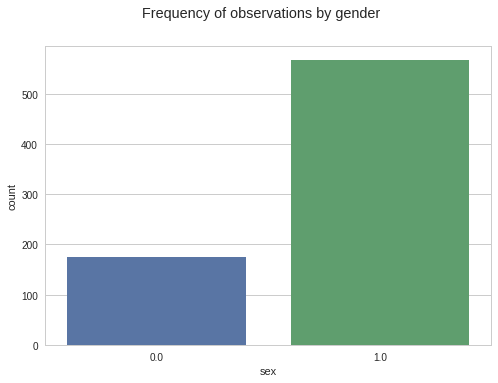

In [132]:
#Gender
#given that gender is a categorical variable, we use a countplot to visualize it
#we always plot the variable of interest on the x axis, and the count or frequency on the y axis
sns.countplot(x='sex', data = df_clean)
plt.suptitle('Frequency of observations by gender')

In [133]:
#Diagnosis
#we check the counts per each value of the variable. sort=False tells pandas not to sort the results by values. 
#normalize = True tells it to return the relative frequencies rather than the absolute counts
#if we had not cleaned the data, we could add parameter dropna=False so that value_counts does not drop null values
df_clean['diagnosis'].value_counts(sort=False, normalize=True)

0    0.481781
1    0.276653
2    0.106613
3    0.105263
4    0.029690
Name: diagnosis, dtype: float64

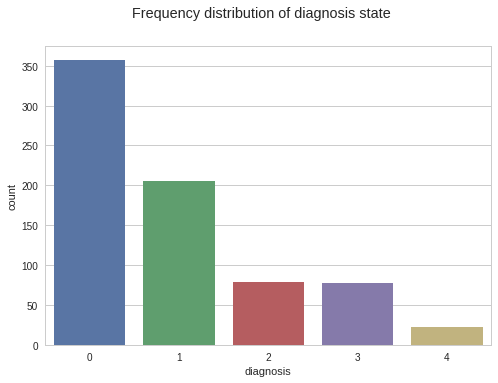

In [134]:
sns.countplot(x='diagnosis', data=df_clean)
plt.suptitle('Frequency distribution of diagnosis state')

In [135]:
#Let's look at age now
#the describe request gives us the count, mean, std, min, max, as well as the quartiles for the
#respective value distribution
df_clean['age'].describe()

count    741.000000
mean      53.099865
std        9.402028
min       28.000000
25%       46.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

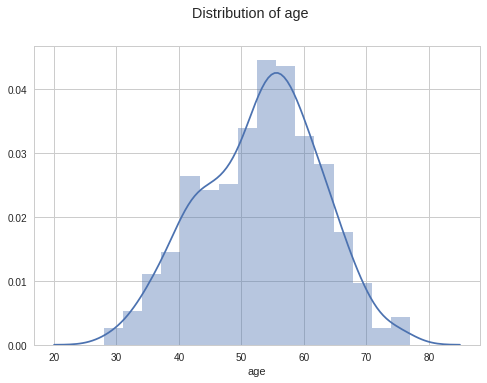

In [136]:
#sns distplot function combines matplotlib hist() function with sns kdeplot() function.
sns.distplot(df_clean['age'])
plt.suptitle('Distribution of age')

In [137]:
df_clean.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis'],
      dtype='object')

In [138]:
df_clean['max_heart_rate'].describe()

count    741.000000
mean     138.740891
std       25.828809
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: max_heart_rate, dtype: float64

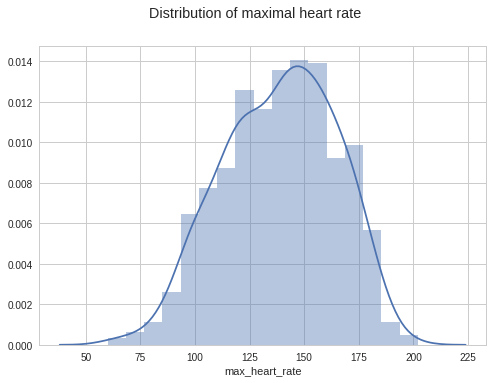

In [139]:
sns.distplot(df_clean['max_heart_rate'])
plt.suptitle('Distribution of maximal heart rate')

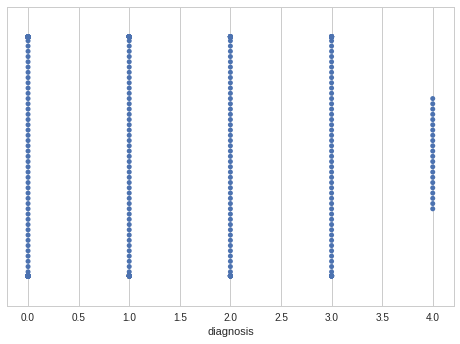

In [140]:
sns.swarmplot('diagnosis', data=df_clean)

In [141]:
#rules for visualizing two variables (recap):
# C-Q: bivariate bar graph with sns factorplot (bin/collapse explanatory variable), categories on x axis, and mean 
#of response variable on y axis
# Q-Q: scatterplot with sns regplot
#C-C: you can plot them one a time. problem with a bivariate graph is that mean has no meaning
#in context of a categorical variable

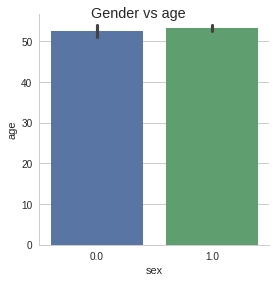

In [142]:
sns.factorplot(x='sex', y='age', kind='bar', data=df_clean)
plt.suptitle('Gender vs age')

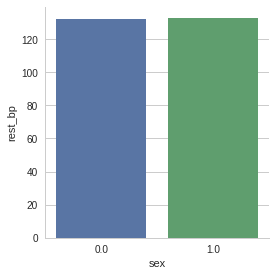

In [143]:
#categorical explanatory variable 'sex' and quantitative response variable 'rest_bp'
#kind = bar asks for a bar graph and ci=None suppresses error bars
sns.factorplot(x='sex', y='rest_bp', data=df_clean, kind='bar', ci=None)

In [144]:
df_clean['chest_pain'].dtype

category

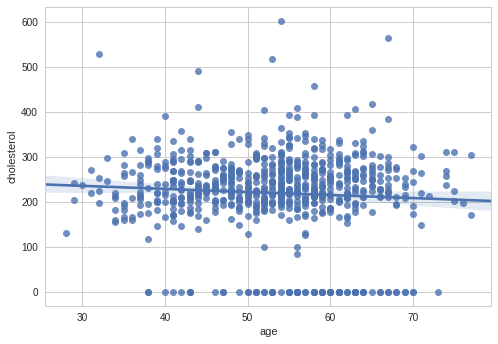

In [145]:
#We use a regplot to plot two quantitative variables, age and allcrimes, while also having a regression line suggesting
#any association present
#we always plot the explanatory variable on the x axis, and the response variable on the y axis
sns.regplot(x='age', y='cholesterol', data=df_clean)

In [146]:
#how can we gain a better idea of how two categorical variables interact?
df_clean.groupby('sex')['diagnosis'].value_counts()/len(df)

sex  diagnosis
0.0  0            0.142391
     1            0.028261
     3            0.008696
     2            0.007609
     4            0.002174
1.0  0            0.245652
     1            0.194565
     2            0.078261
     3            0.076087
     4            0.021739
Name: diagnosis, dtype: float64

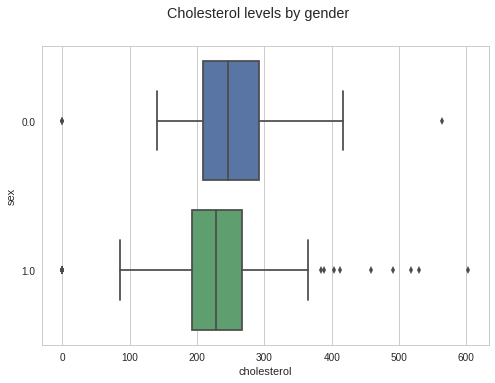

In [147]:
sns.boxplot(x='cholesterol', y = 'sex', data=df_clean)
plt.suptitle('Cholesterol levels by gender')

In [148]:
#describing the dataset/the variables of the dataset, after we group the values in the dataset
#by age category
df_clean.groupby('diagnosis').describe()

age                                                       \
           count       mean       std   min    25%   50%    75%   max   
diagnosis                                                               
0          357.0  50.302521  9.417789  28.0  43.00  51.0  57.00  76.0   
1          205.0  52.946341  8.577333  31.0  47.00  54.0  59.00  75.0   
2           79.0  58.430380  7.041422  42.0  55.00  59.0  63.00  74.0   
3           78.0  59.179487  7.870285  39.0  54.00  60.0  64.00  77.0   
4           22.0  59.227273  8.286143  38.0  56.25  60.5  63.75  77.0   

          cholesterol             ...  rest_bp        st_depression            \
                count        mean ...      75%    max         count      mean   
diagnosis                         ...                                           
0               357.0  233.336134 ...    140.0  190.0         357.0  0.425210   
1               205.0  229.443902 ...    145.0  200.0         205.0  1.088293   
2                79.0  182.607595 ...    144.5  180.0          79.0  1.394937   
3                78.0  178.205128 ...    150.0  200.0          78.0  1.598718   
4                22.0  206.045455 ...    157.5  190.0          22.0  2.363636   

                                                
                std  min   25%  50%   75%  max  
diagnosis                                       
0          0.712199 -0.5  0.00  0.0  0.80  4.2  
1          1.021369  0.0  0.00  1.0  2.00  5.0  
2          1.204787 -1.0  0.00  1.4  2.10  4.0  
3          1.352006  0.0  0.50  1.5  2.15  6.2  
4          1.283798  0.0  1.25  2.5  3.45  4.4  

[5 rows x 40 columns]

In [149]:
#before starting to manipulate the dataset itself, we make a copy, and will work on the copy
#rather than the original reduced dataset
df_clean_copy = df_clean.copy()

In [150]:
#Now we can move to inferential statistics

#Hypothesis testing:
#1. define null hypothesis and alternate hypothesis
#2. choose sample
#3. analyze evidence
#4. interpret results

#Typical H0: there is no relationship between the explanatory and response variables
#Typical H1: there is a statistically significant relationship

#Bivariate statistical tools:
#ANOVA; chi-square; correlation coefficient
''' The difference between these three is that ... something about them all making assumptions about the data but all
making different assumptions. I guess you have to choose the best one depending on the data/variables'''

#a result is statistically significant if it is unlikely to be the result of chance

#p value is also the type 1 error rate: the number of times we would be wrong in rejecting the null hypothesis 
#when it is true
#p=0.03: if we reject the null hypothesis, we would be correct 97/100 times.
#Type 1 vs Type 2 errors

#F = variation among sample means/variation within sample groups
#ANOVA F Test: are the differences among the sample means due to true differences among the
#population means, or merely due to sampling variability
#p value of ANOVA: probability of getting an F value as large or larger if H0 is true
#probability of finding this value if there is no difference between sample means

#before performing these analyses, one needs to use the .dropna() function to include only
#valid data

In [151]:
#we will test the null hypothesis that age and diagnosis are not related.
#the type of variables we have (explanatory/response and categorical/quantitative for each) determines the type of 
#statistical tools we will use
#Explanatory categorical and response quantitative: ANOVA
#Explanatory categorical and response categorical: Chi Square test
#Explanatory quantitative and response categorical: classify/bin explanatory variable and use chi square test
#Explanatory quantitative and response quantitative: pearson correlation

In [152]:
#Going the wrong way?
test1 = smf.ols(formula = 'age ~ C(diagnosis)', data = df_clean_copy).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     28.42
Date:                Fri, 30 Jun 2017   Prob (F-statistic):           5.56e-22
Time:                        14:39:28   Log-Likelihood:                -2658.2
No. Observations:                 741   AIC:                             5326.
Df Residuals:                     736   BIC:                             5350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            50.3025      0.46

In [153]:
#Whenever the explanatory variable has more than 2 levels, we need to also perform post hoc statistical tests to 
#better understand the relationship between the explanatory variable and the response variable
#we know the groups tested are different overall, but not exactly where/how they are different
#for explanatory variables with multiples levels, F test and p value do not tell us why the
#group means are not equal, or how. there are many ways in which this can be the case.
#How are they associated per level of the explanatory variable?
#post hoc tests aim to protect against type 1 error when explanatory variable is multilevel

In [154]:
#now we examine the means and standard deviations
grouped1_mean = df_clean_copy.groupby('diagnosis').mean()['age']
print(grouped1_mean)

diagnosis
0    50.302521
1    52.946341
2    58.430380
3    59.179487
4    59.227273
Name: age, dtype: float64


In [155]:
grouped1_std = df_clean_copy.groupby('diagnosis').std()['age']
print(grouped1_std)

diagnosis
0    9.417789
1    8.577333
2    7.041422
3    7.870285
4    8.286143
Name: age, dtype: float64


In [156]:
#given that we have an explanatory categorical variable with multiple levels, we use the 
#tuckey hsd test
#other tests:
#Holm T
#Least Significant Difference

tuckey1 = multi.MultiComparison(df_clean_copy['age'], df_clean_copy['diagnosis'])
res1 = tuckey1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     2.6438   0.5412  4.7464  True 
  0      2     8.1279   5.1446 11.1111  True 
  0      3     8.877    5.8781 11.8758  True 
  0      4     8.9248   3.654  14.1955  True 
  1      2     5.484    2.3067  8.6614  True 
  1      3     6.2331   3.0411  9.4252  True 
  1      4     6.2809   0.898  11.6639  True 
  2      3     0.7491  -3.0808  4.579  False 
  2      4     0.7969  -4.9872  6.5809 False 
  3      4     0.0478  -5.7443  5.8399 False 
---------------------------------------------


In [157]:
#We will now test another hypothesis:
#Hypothesis(0)(a): the presence of chest pain and the diagnosis (0 or 1) are independent
#Alternative Hypothesis 1: presence of chest pain and diagnosis are not independent

In [158]:
#Feature engineering
#Paradox: you can get better results with great feature engineering and a poor model than with poor feature engineering
#but a great model
#"A feature is an attribute that is useful to your problem" Dr. Jason Brownlee
#"The algorithms we used are very standard for Kagglers...We spent most of our efforts in feature engineering."
#Xavier Conort, #1 Kaggler in 2013
#Aims to convert data attributes into data features
#Aims to optimize data modelling
#Requires understanding of the dataset and research problem, and understanding of model you plan on using
#can be domain driven, or data driven
#i.e. for SVM with linear kernel you need to manually construct nonlinear interactions between
#features and feed them as input to your SVM model. An SVM with polynomial kernel will naturally
#capture them.
#other example: SVMs are very sensitive to dimensions of features, while DT/RFs are not
#With tabular data you combine, aggregate, split and/or decompose features in order to create new ones
#Given an output y and a feature x, you can try the following transforms first:
#e^x, log(x), x^2, x^3
#an indicator of the usefulness of the transformation is if the correlation between y and x'
#is higher than the correlation between y and x
#best way to validate this is to check your model error with or without the transformed feature
#http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
#http://trevorstephens.com/kaggle-titanic-tutorial/r-part-4-feature-engineering/

diagnosis_dic = {0:0, 1:1, 2:1, 3:1, 4:1}
df_clean_copy['diagnosis_binary'] = df_clean_copy['diagnosis'].map(diagnosis_dic)

In [159]:
df_clean_copy['diagnosis_binary'].value_counts()

1    384
0    357
Name: diagnosis_binary, dtype: int64

In [160]:
#contingency table of observed counts
#the crosstab function allows us to cross one variable with another
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.
ct1 = pd.crosstab(df_clean_copy['diagnosis_binary'], df_clean_copy['chest_pain'])
print(ct1)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                  23  128  112   94
1                  15   22   49  298


In [161]:
#column percentages
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)

chest_pain             1.0       2.0       3.0       4.0
diagnosis_binary                                        
0                 0.605263  0.853333  0.695652  0.239796
1                 0.394737  0.146667  0.304348  0.760204


In [162]:
#chi square test
#Expected counts: p assuming events are independent. p(1) * p(2) | column total*row total/table total
#Chi square statistic summarizes this. difference between our obersavtion and what we would expect if H0 is true
#We rely on the p value, as different distributions define whether the chi square itself is large or not

print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1

chi-square value, p value, expected counts
(206.69693667917477, 1.5066891002705367e-44, 3, array([[  18.30769231,   72.26720648,   77.56680162,  188.8582996 ],
       [  19.69230769,   77.73279352,   83.43319838,  203.1417004 ]]))


In [163]:
#Explanatory variable with multiple levels!
#we would have to do a pairwise comparison between every two groups of the explanatory
#variable, vs the response variable
#This would be a Bonferroni adjustment - we adjust p value we use by number of pairwise comparisons, and test these.

In [164]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

In [165]:
ct2 = pd.crosstab(df_clean_copy['diagnosis_binary'], df_clean_copy['sex'])
print(ct2)

sex               0.0  1.0
diagnosis_binary          
0                 131  226
1                  43  341


In [166]:
#column percentages
colsum2 = ct2.sum(axis=0)
colpct2 = ct2/colsum2
print(colpct2)

sex                    0.0       1.0
diagnosis_binary                    
0                 0.752874  0.398589
1                 0.247126  0.601411


In [167]:
#chi square test
print('chi-square value, p value, expected counts')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)
''' By convention, if the p value is smaller than 0.05; it is significant '''

chi-square value, p value, expected counts
(65.523823461676344, 5.741569147761909e-16, 1, array([[  83.82995951,  273.17004049],
       [  90.17004049,  293.82995951]]))


In [168]:
#Moderators 
''' also known as lurking variables and some other name... '''
#a moderator is a third variable that affects the direction and/or strength between your explanatory and response variables
#the question is, is our response variable associated with our explanatory variable, for each level of our third variable?

In [169]:
#let's see if sex is a moderator in the statistically significant relationship between chest pain and diagnosis
df_clean_copy_men = df_clean_copy[df_clean_copy['sex'] == 0]
len(df_clean_copy_men)

174

In [170]:
df_clean_copy_women = df_clean_copy[df_clean_copy['sex'] == 1]
len(df_clean_copy_women)

567

In [171]:
#contingency table of observed counts
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.
ct3 = pd.crosstab(df_clean_copy_men['diagnosis_binary'], df_clean_copy_men['chest_pain'])
print(ct3)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                   9   47   44   31
1                   0    4    6   33


In [172]:
#column percentages
colsum = ct3.sum(axis=0)
colpct = ct3/colsum
print(colpct)

chest_pain        1.0       2.0   3.0       4.0
diagnosis_binary                               
0                 1.0  0.921569  0.88  0.484375
1                 0.0  0.078431  0.12  0.515625


In [173]:
#chi square test
print('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(ct3)
print(cs3)

chi-square value, p value, expected counts
(39.896349270579876, 1.1207983387044401e-08, 3, array([[  6.77586207,  38.39655172,  37.64367816,  48.18390805],
       [  2.22413793,  12.60344828,  12.35632184,  15.81609195]]))


In [174]:
#contingency table of observed counts
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.
ct4 = pd.crosstab(df_clean_copy_women['diagnosis_binary'], df_clean_copy_women['chest_pain'])
print(ct4)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                  14   81   68   63
1                  15   18   43  265


In [175]:
#column percentages
colsum = ct4.sum(axis=0)
colpct = ct4/colsum
print(colpct)

chest_pain             1.0       2.0       3.0       4.0
diagnosis_binary                                        
0                 0.482759  0.818182  0.612613  0.192073
1                 0.517241  0.181818  0.387387  0.807927


In [176]:
#chi square test
print('chi-square value, p value, expected counts')
cs4 = scipy.stats.chi2_contingency(ct4)
print(cs4)

chi-square value, p value, expected counts
(153.13334878752136, 5.556477341199484e-33, 3, array([[  11.55908289,   39.46031746,   44.24338624,  130.7372134 ],
       [  17.44091711,   59.53968254,   66.75661376,  197.2627866 ]]))


In [177]:
df_clean_copy_women.groupby('chest_pain')['diagnosis'].value_counts()

chest_pain  diagnosis
1.0         0             14
            1              9
            2              3
            3              2
            4              1
2.0         0             81
            1             14
            2              2
            3              2
3.0         0             68
            1             22
            3             11
            2              8
            4              2
4.0         1            134
            0             63
            2             59
            3             55
            4             17
Name: diagnosis, dtype: int64

In [178]:
#the relationship between chest pain and the diagnosis holds for both levels of the sex variables, hence it is not a moderator.
#we would test for moderator variables in the case of a quantitative response variable the same way
#divide the population into the sublevels of the third variables
#conduct an smf.ols test for each to see if the relationship is statistically significant for each level

In [179]:
#identifying a confounding variable does not allow to establish causation, just to get closer to a causal connection.
#due to infinite number of possible lurking variables, observational studies cannot rly establish causation
#a lurking of confounding variable is a third variable that is associated with both the explanatory and response 
#variables.
#i.e. x=firefighters; y=damage caused by a fire. plot would suggest more firefighters causes more fire damage.
#in reality there is a third confounding variable that influences both, seriousness of the fire.
#In a study we want to demonstrate that our statistical relationship is valid even after controlling for confounders.

In [180]:
#now we will test whether there is a relationship between two quantitative variables, age and cholesterol
#for this we use the pearson correlation test
#r, going from -1 to 1 only tells us whether the two variables are linearly related. they may be related in nonlinear ways
#therefore it's always important to look at r in parallel with a scatterplot of the two variables
#r squared is a measure of how much variability in one variable can be explained by the other variable
#to calculate the pearson coefficient we need to remove all missing values
#Please remember that when two variables are correlated it is possible that:
#X causes Y or Y causes X
#Z causes both X and Y
#X and Y are correlated by chance - a spurious correlation

In [181]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

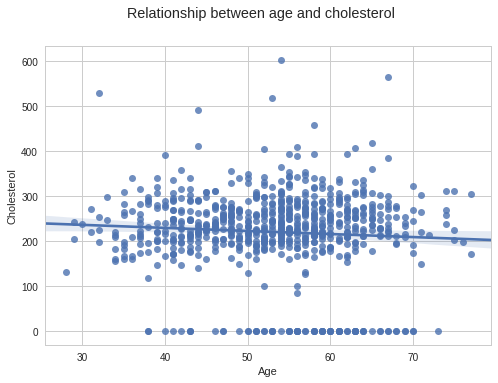

In [182]:
scat1 = sns.regplot(x='age', y = 'cholesterol', fit_reg=True, data = df_clean_copy)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.suptitle('Relationship between age and cholesterol')
scat1

In [183]:
#the r coefficient is a measure of association, of how closely points are clustered around a line
#correlations are always between -1 and 1
#r measures solely linear association
#association, not causation
#it is a number without units
#it can mislead in presence of outliers or non linear association -> always draw a scatter plot
#when you look at a scatter plot you look at direction form and strength of relationship
#ecological correlations based on averages can be misleading and overstate strength of associations
#for individual units
print('association between age and cholesterol')
print(scipy.stats.pearsonr(df_clean_copy['age'], df_clean_copy['cholesterol']))

association between age and cholesterol
(-0.068169552180946086, 0.063640508704807752)


In [184]:
#Linear regression:
#multivariate linear regression for quantitative response variable
#logistic regression for binary categorical response variable

#Assumptions:

#Normality: residuals from our linear regression model are normally distributed. if they are not,
#our model may be misspecified.

#Linearity: association between explanatory and response variable is linear

#Homoscedasticity (or assumption of constant variance): variability in the response variable is the same at all levels
#of the explanatory variable. i.e. if residuals are spread around the regression line in a 
#similar manner as you move along the x axis (values of the explanatory variable)

#Independence: observations are not correlated with each other. Longitudinal data can violate this assumption, as well 
#as hierarchical nesting/clustering data i.e. looking at students by classes. this assumption is the most serious
#to be violated, and also cannot be fixed by modifying the variables. the data structure itself is the problem.
#We have to contend with:

#Multicollinearity: explanatory variables are highly correlated with each other. this can mess up your parameter estimates
#or make them highly unstable. Signs: 1. highly associated variable not significant. 2. negative regression coefficient
#that should be positive. 3. taking out an explanatory variable drastically changes the results.

#Outliers: can affect your regression line, meaning it will 
#multiple regression model allows us to find the relationship between one explanatory variable and the 
#reponse variable, while controlling (holding constant at 0) all the other variables.
#categorical sex (1 and 2); age restricted to 18-25 group: each variable needs to include a meaningful
#value of 0, so as to make it easier to interpret the coefficients
#for a categorical variable, we can just recode one of the values to be 0
#for a quantitative variable, we have to center it. Centering = subtracting the mean of a variable
#from the value of the variable. We are therefore recoding it so that its mean=0.
#we only center explanatory variables not response one
#in logistic regression we always need to code response binary variable so that 0 means no outcome and 1 outcome occurred
#this is true whether outcome is positive or negative.

In [185]:
#We will create a multiple regression model, investigating the relationship between our explanatory variables and 
#our response variable diagnosis
#we will first center the explanatory variables. for categorical variables, one of the categories needs to be 0, for 
#quantitative variables, we need to subtract the mean from each value.

#Notes: 
#do not center the response variable.
#is using logistic regression, do recode the binary response variable to make sure one class is coded as 0

In [186]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

In [187]:
#categorical variables: sex, chest_pain, fasting_bs, rest_ecg, exercise_angina
#quantitative variables: age, rest_bp, cholesterol, max_heart_rate, st_depression

In [188]:
df_clean_copy['chest_pain'].value_counts()

4.0    392
3.0    161
2.0    150
1.0     38
Name: chest_pain, dtype: int64

In [189]:
recode_chest_pain = {1:0, 2:1, 3:2, 4:3}
df_clean_copy['chest_pain_p'] = df_clean_copy['chest_pain'].map(recode_chest_pain)

In [190]:
df['fasting_bs'].value_counts()

0.0    692
1.0    138
Name: fasting_bs, dtype: int64

In [191]:
df['rest_ecg'].value_counts()

0.0    551
2.0    188
1.0    179
Name: rest_ecg, dtype: int64

In [192]:
df['exercise_angina'].value_counts()

0.0    528
1.0    337
Name: exercise_angina, dtype: int64

In [193]:
''' T0 centre a series, subract the mean from every value. (The mean of the result will then be zero) '''
df_clean_copy['age_c'] = df_clean_copy['age'] - df_clean_copy['age'].mean()

In [194]:
df_clean_copy['rest_bp_c'] = df_clean_copy['rest_bp'] - df_clean_copy['rest_bp'].mean()

In [195]:
df_clean_copy['cholesterol_c'] = df_clean_copy['cholesterol'] - df_clean_copy['cholesterol'].mean()

In [196]:
df_clean_copy['max_heart_rate_c'] = df_clean_copy['max_heart_rate'] - df_clean_copy['max_heart_rate'].mean()

In [197]:
df_clean_copy['st_depression_c'] = df_clean_copy['st_depression'] - df_clean_copy['st_depression'].mean()

In [198]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary', 'chest_pain_p', 'age_c', 'rest_bp_c',
       'cholesterol_c', 'max_heart_rate_c', 'st_depression_c'],
      dtype='object')

In [199]:
df_clean_copy_c = df_clean_copy[['age_c', 'sex', 'chest_pain_p', 'rest_bp_c', 'cholesterol_c',
                                       'fasting_bs', 'rest_ecg', 'max_heart_rate_c', 'exercise_angina',
                                       'st_depression_c', 'diagnosis_binary']]

In [200]:
df_clean_copy_c.columns

Index(['age_c', 'sex', 'chest_pain_p', 'rest_bp_c', 'cholesterol_c',
       'fasting_bs', 'rest_ecg', 'max_heart_rate_c', 'exercise_angina',
       'st_depression_c', 'diagnosis_binary'],
      dtype='object')

In [201]:
model1 = smf.ols(formula = 'age_c ~ sex', data = df_clean_copy_c).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8054
Date:                Fri, 30 Jun 2017   Prob (F-statistic):              0.370
Time:                        14:39:29   Log-Likelihood:                -2711.1
No. Observations:                 741   AIC:                             5426.
Df Residuals:                     739   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5596      0.713     -0.785      0.4

In [202]:
model2 = smf.ols(formula = 'age_c ~ sex + cholesterol_c', data=df_clean_copy_c).fit()
print(model2.summary())
''' R-squared is a way of measuring how much of the variability in your data can be explained by the model you are using '''

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.889
Date:                Fri, 30 Jun 2017   Prob (F-statistic):              0.152
Time:                        14:39:29   Log-Likelihood:                -2709.6
No. Observations:                 741   AIC:                             5425.
Df Residuals:                     738   BIC:                             5439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3644      0.721     -0.506

In [203]:
model3 = smf.ols(formula = 'age_c ~ sex + C(chest_pain_p) + (rest_bp_c) + cholesterol_c + fasting_bs + C(rest_ecg) + \
                            max_heart_rate_c + exercise_angina + st_depression_c + diagnosis_binary', data = df_clean_copy_c).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     21.58
Date:                Fri, 30 Jun 2017   Prob (F-statistic):           1.25e-43
Time:                        14:39:29   Log-Likelihood:                -2590.6
No. Observations:                 741   AIC:                             5209.
Df Residuals:                     727   BIC:                             5274.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [204]:
#We identified some explanatory variables that are associated with age, but our model overall barely explains 27%
#of the variation in the response variable
#let's run some diagnostics

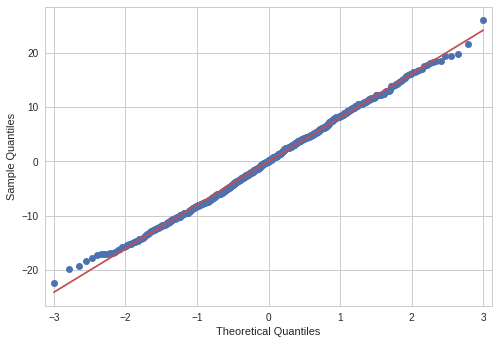

In [205]:
#Q-Q plot for normality
fig1 = sm.qqplot(model3.resid, line='r')
#red line represents residuals we would expect if model residuals were normally distributed
#our residuals below deviate significantly from red line, especially at lower and higher quantiles, meaning they do not
#follow a normal distribution. This means curvilinear association we saw is not fully explained by our model. We could add
#more explanatory variables.

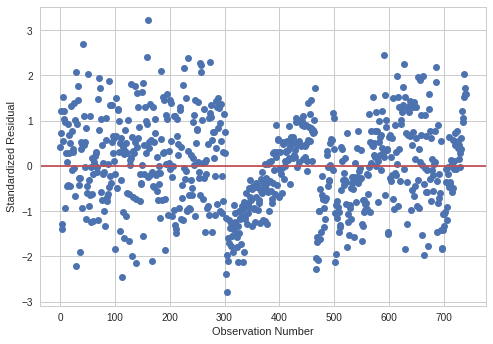

In [206]:
#simple plot of residuals
stdres = pd.DataFrame(model3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
#resid_pearson normalizes our model's residuals
#ls='none' means points will not be connected
#we expect most residuals to fall within 2sd of the mean. More than 2 are outliers, and more than 3 extreme outliers.
#if more than 1% of our observations have standardized residuals with an absolute value greater than 2.5, or more than 5%
#have one greater than or equal to 2, there is evidence that the fit of the model is poor. largest cause of this is ommission
#of important explanatory variables in our model.
#standardized residuals in linear regression will always be linear, and the line will be horizontal
#normalizing or standardizing residuals amounts to making them have a mean of 0 and sd of 1 so as to fit a normal standard distribution
#if residuals show a strong pattern (up, down, polynomial) then it is a good indication of nonlinearity
#in the underlying relationship

Figure(576x396)


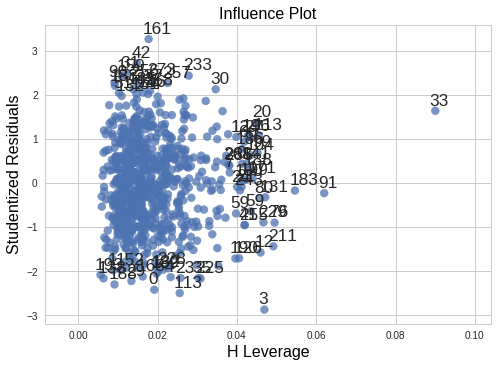

In [207]:
#leverage plot
fig4 = sm.graphics.influence_plot(model3, size=8)
print(fig4)
#we see that we have extreme outliers, but they are low leverage, meaning they do not have an undue influence on our
#estimation of the regression model.
#we also have high leverage observations, but they are not outliers.
#we have no observations that are both high leverage and outliers.
''' 
Leverage means 'how much the var influences the model' and the stud. residuals show how far the var is from the mean or from what the model
predicts (not sure which). So if both are far from 0, we need to figure out what's going on. If both are close to 0, we don't care.
'''

In [208]:
#now let's focus on our actual response variable in the study
#since it is a binary variable, we will need to use a logistic regression model

In [209]:
lreg1 = smf.logit(formula = 'diagnosis_binary ~ C(chest_pain_p)', data = df_clean_copy_c).fit()
print(lreg1.summary())

Optimization terminated successfully.
         Current function value: 0.543711
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            3
Date:                Fri, 30 Jun 2017   Pseudo R-squ.:                  0.2148
Time:                        14:39:31   Log-Likelihood:                -402.89
converged:                       True   LL-Null:                       -513.13
                                        LLR p-value:                 1.581e-47
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4274      0.332     -1.288      0.198      -1.078       0.223

In [210]:
lreg2 = smf.logit(formula = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + cholesterol_c', data = df_clean_copy_c).fit()
print(lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.488979
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      734
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Jun 2017   Pseudo R-squ.:                  0.2939
Time:                        14:39:31   Log-Likelihood:                -362.33
converged:                       True   LL-Null:                       -513.13
                                        LLR p-value:                 3.728e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.6537      0.408     -4.058      0.000      -2.452      -0.855

In [211]:
lreg3 = smf.logit(formula = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + rest_bp_c + \
                  cholesterol_c + fasting_bs + C(rest_ecg) + max_heart_rate_c + \
                  exercise_angina + st_depression_c', data = df_clean_copy_c).fit()
print(lreg3.summary())

Optimization terminated successfully.
         Current function value: 0.421593
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                           13
Date:                Fri, 30 Jun 2017   Pseudo R-squ.:                  0.3912
Time:                        14:39:31   Log-Likelihood:                -312.40
converged:                       True   LL-Null:                       -513.13
                                        LLR p-value:                 1.100e-77
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.9267      0.465     -4.139      0.000      -2.839      

In [212]:
#however, for logistic regression it makes much more sense to calculate the odds ratio
#if OR=1, the model is not statistically significant
#if OR<1, the response variable becomes less likely as the explanatory one increases
#if OR>1, the response variable becomes more likely as the explanatory one increases
print('Odds Ratios')
print(np.exp(lreg3.params))
#Interpretation of OR
''' The probability for you to get a result ==1 (as in 1 or 0) for a given var if you hold all the other variables constant '''

Odds Ratios
Intercept                 0.145625
sex[T.1.0]                3.706415
C(chest_pain_p)[T.1]      0.573894
C(chest_pain_p)[T.2]      0.868495
C(chest_pain_p)[T.3]      3.672428
fasting_bs[T.1.0]         1.662336
C(rest_ecg)[T.1.0]        0.916029
C(rest_ecg)[T.2.0]        1.263268
exercise_angina[T.1.0]    2.732984
age_c                     1.021933
rest_bp_c                 1.006246
cholesterol_c             0.998173
max_heart_rate_c          0.985909
st_depression_c           1.851057
dtype: float64


In [213]:
# odd ratios with 95% confidence intervals
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))
#we have 95% confidence that the sex odds ratio will be between 2.24 and 6.12.

                        Lower CI  Upper CI        OR
Intercept               0.058480  0.362629  0.145625
sex[T.1.0]              2.242497  6.125988  3.706415
C(chest_pain_p)[T.1]    0.224975  1.463965  0.573894
C(chest_pain_p)[T.2]    0.364589  2.068857  0.868495
C(chest_pain_p)[T.3]    1.580165  8.535010  3.672428
fasting_bs[T.1.0]       0.938503  2.944433  1.662336
C(rest_ecg)[T.1.0]      0.506524  1.656603  0.916029
C(rest_ecg)[T.2.0]      0.769914  2.072760  1.263268
exercise_angina[T.1.0]  1.737951  4.297705  2.732984
age_c                   0.997020  1.047468  1.021933
rest_bp_c               0.995035  1.017583  1.006246
cholesterol_c           0.995907  1.000445  0.998173
max_heart_rate_c        0.977157  0.994740  0.985909
st_depression_c         1.480481  2.314391  1.851057


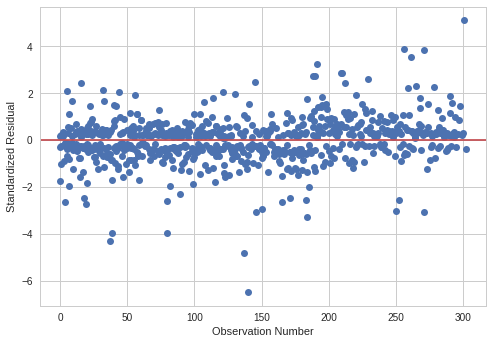

In [214]:
#simple plot of residuals
stdres = pd.DataFrame(lreg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
#resid_pearson normalizes our model's residuals
#ls='none' means points will not be connected
#we expect most residuals to fall within 2sd of the mean. More than 2 are outliers, and more than 3 extreme outliers.
#if more than 1% of our observations have standardized residuals with an absolute value greater than 2.5, or more than 5%
#have one greater than or equal to 2, there is evidence that the fit of the model is poor. largest cause of this is ommission
#of important explanatory variables in our model.
#standardized residuals in linear regression will always be linear, and the line will be horizontal
#if residuals show a strong pattern (up, down, polynomial) then it is a good indication of nonlinearity
#in the underlying relationship

In [215]:
df_clean_mice = df_red[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull() & df_red['fasting_bs'].notnull() & \
                  df['max_heart_rate'].notnull() & df['exercise_angina'].notnull()]

In [216]:
df_clean_mice.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
cholesterol        False
fasting_bs         False
rest_ecg           False
max_heart_rate     False
exercise_angina    False
st_depression       True
diagnosis          False
dtype: bool

In [217]:
df_clean_mice.describe()

,age,rest_bp,cholesterol,max_heart_rate,st_depression
count,745.000000,745.000000,745.000000,745.000000,741.000000
mean,53.130201,132.771812,219.923490,138.817450,0.893117
std,9.392743,18.599746,93.713004,25.825905,1.086922
min,28.000000,0.000000,0.000000,60.000000,-1.000000
25%,46.000000,120.000000,197.000000,120.000000,0.000000
50%,54.000000,130.000000,231.000000,140.000000,0.500000
75%,60.000000,140.000000,271.000000,160.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [218]:
#to be able to use MICE you will need to update the statsmodels coming with Anaconda, to 0.8.0
import statsmodels.imputation.mice as mice
import statsmodels
from statsmodels.base.model import LikelihoodModelResults
from statsmodels.regression.linear_model import OLS
from collections import defaultdict
formula_mice = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + rest_bp_c + \
                  cholesterol_c + fasting_bs + C(rest_ecg) + max_heart_rate_c + \
                  exercise_angina + st_depression_c'
mice = statsmodels.mice.MICE(formula_mice, slf.logit, df_clean_mice)
results = mice.fit()
print(results.summary())

AttributeError: module 'statsmodels' has no attribute 'mice'

In [ ]:
#Machine learning encompasses a wide range of statistical methods. These can be used for:
#1. Describe associations
#2. Search for patterns
#3. Make predictions
#We typically do not use ML with hypotheses in mind. instead we learn from the data
#We learn from the test set.
#Accuracy = test error rate. The rate at which it correctly classifies or estimates.
#Goal is to minimize test error rate.
#Linear regression: accuracy = mean squared error
#Variance = change in parameter estimates across different data sets
#Bias = how far off model estimated values are from true values
#ideally we want low variance and low bias, but they are negatively associated. As one decreases, the other increases.
#Generally, complexity of model leads to high variance and low bias
#Simple models will have lower variance, but also be more biased.
#Logistic regression: accuracy = how well the model classifies observations

In [ ]:
#Supervised Prediction includes:
#Linear regression
#Pattern recognition
#Discriminant analysis
#Multivariate function estimation
#Supervised ML techniques
#Decision trees
#Like linear regression, decision trees are designed for supervised prediction problems.
#Root node, and terminal nodes or leaves.
#Growing the tree process: binary splits maximize correct classification; all cut points are tested; subgroups showing
#similar outcomes are generated
#Validating the tree: cross validation guards against overfit. A random subset is tested and only 'branches' that improve
#the classification are retained
#Selected sub tree is the lowest probability of misclassification
#Trees allow the handling of many variables that cannot be done as efficiently in linear regression. They can also uncover
#constellations of variables that can predict high or low rates of the response variable.

In [ ]:
#Strengths of decision trees
#Can select from a large number of variables those and their interactions that are most important in determining the
#target or response variable to be explained
#They are easy to interpret and visualize, especially when the tree is small
#Can handle large data sets well and can predict both binary, categorical target variables and also quantitative ones
#Limitations: small changes in the data can lead to different splits and this can undermine the interpretability of the model
#and decision trees are not very reproducible on future data
#Note: decision trees cannot handle missing data!

In [ ]:
df_clean_copy.columns

In [ ]:
df_sex = pd.get_dummies(df_clean_copy['sex'], prefix = 'sex')

In [ ]:
df_chest_pain = pd.get_dummies(df_clean_copy['chest_pain'], prefix = 'chest_pain')
df_fasting_bs = pd.get_dummies(df_clean_copy['fasting_bs'], prefix = 'fasting_bs')
df_rest_ecg = pd.get_dummies(df_clean_copy['rest_ecg'], prefix = 'rest_ecg')
df_exercise_angina = pd.get_dummies(df_clean_copy['exercise_angina'], prefix='exercise_angina')

In [ ]:
df_merged = pd.concat([df_clean_copy, df_sex, df_chest_pain, df_fasting_bs, df_rest_ecg, df_exercise_angina], axis=1)

In [ ]:
df_merged.columns

In [ ]:
df_dt = df_merged[['age', 'sex_0.0', 'sex_1.0', 'chest_pain_1.0', 'chest_pain_2.0', 'chest_pain_3.0', \
                       'chest_pain_4.0', 'rest_bp', 'cholesterol', 'fasting_bs_0.0', 'fasting_bs_1.0', \
                      'rest_ecg_1.0', 'rest_ecg_2.0', 'max_heart_rate', 'exercise_angina_0.0', 'exercise_angina_1.0',\
                       'st_depression', 'diagnosis_binary']]

In [ ]:
predictors = df_dt.ix[:, df_dt.columns != 'diagnosis_binary']

In [ ]:
predictors.head(5)

In [ ]:
target = df_dt['diagnosis_binary']

In [ ]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size = 0.4)

In [ ]:
print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [ ]:
predictions = classifier.predict(pred_test)

In [ ]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

In [ ]:
sklearn.metrics.accuracy_score(tar_test, predictions)

In [ ]:
#Random forests
#Forests of trees
#Splits on only ONE variable in each node. Variable with largest association with Target among
#candidate variables. Only among variables randomly selected to be tested for that node.
#First a subset of explanatory variables is selected at random
#Next the node is split with the Best variable of the subset. After this node is split, a new list of subset variables
#is selected at random to split on the next node.
#typical k fold values: 5 or 10

In [ ]:
classifier2 = RandomForestClassifier(n_estimators = 25)
classifier2 = classifier.fit(pred_train, tar_train)

In [ ]:
predictions2 = classifier2.predict(pred_test)

In [ ]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

In [ ]:
sklearn.metrics.accuracy_score(tar_test, predictions)

In [ ]:
#fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train, tar_train)
#display the relative importance of each attribute
print(model.feature_importances_)

In [ ]:
trees = range(25)
accuracy = np.zeros(25)

In [ ]:
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators = idx + 1)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)

In [ ]:
plt.cla()
plt.plot(trees, accuracy)

In [ ]:
#Lasso regression
#penalized regression method
#supervised learning method
#shrinkage and selection method
#shrinkage = constraints on parameters that shrinks coefficients to 0
#selection = identifies most imp. variables associated with response variable
#Can increase prediction accuracy and improve model interpretability vs standard OLS
#When lambda=0, it becomes OLS regression
#Bias increases and variance decreases as lambda increases
#in Lasso regression, penalty is not fair if variables are not on the same scale
#standardize all predictor variables to have means equal to 0 and sd = 1
#Lasso regression has several algorithms, among them LAR (least angle regression-)
#sklearn library refers to the penalty term as 'alpha'

In [ ]:
#Limitations of lasso regression
#1. Selection of variables is 100% statistically driven
#2. If predictors are correlated, lasso arbitrarily selects one
#3. Estimating p values is not straightforward
#4. Different selection methods or statistical softwares can provide different results
#5. No guarantee that selected model is not overfitted nor that it's the best model
#All regression models can produce meaningless models without human intervention
#Best approach is a combination of ML, human intervention, and independent application

In [ ]:
predictors.columns

In [ ]:
predictors['age'] = preprocessing.scale(predictors['age'].astype('float64'))
predictors['sex'] = preprocessing.scale(predictors['sex'].astype('float64'))
predictors['chest_pain'] = preprocessing.scale(predictors['rest_bp'].astype('float64'))
predictors['cholesterol'] = preprocessing.scale(predictors['cholesterol'].astype('float64'))
predictors['fasting_bs'] = preprocessing.scale(predictors['fasting_bs'].astype('float64'))
predictors['rest_ecg'] = preprocessing.scale(predictors['rest_ecg'].astype('float64'))
predictors['max_heart_rate'] = preprocessing.scale(predictors['max_heart_rate'].astype('float64'))
predictors['exercise_angina'] = preprocessing.scale(predictors['exercise_angina'].astype('float64'))
predictors['st_depression'] = preprocessing.scale(predictors['st_depression'].astype('float64'))

In [ ]:
#split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                             test_size=.3, random_state=123)

In [ ]:
#specify lasso regression model
model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

In [ ]:
dict(zip(predictors.columns, model.coef_))

In [ ]:
#plot coefficient regression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

In [ ]:
#plot mean squared error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k', label = 'Average across the folds',
         linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [ ]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

In [ ]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

In [ ]:
groupby()....size()
groupby().size()*100/len(data)